In [1]:
from img_show import *
import cv2
import numpy as np
import matplotlib.pyplot as plt 

In [23]:

w=160
h=120
w=640
h=480
w=160
h=120


data_from_txt,len_=get_image_from_txtFile(w,h,"../output.txt",imagetype.RGB)
print(data_from_txt.shape,len_)

(19200,) 19200


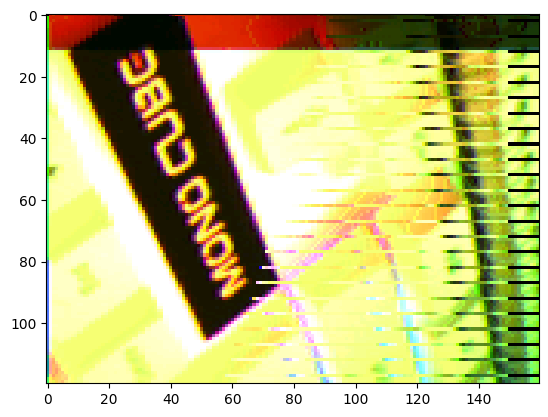

In [24]:
rgb=RGB565_to_RGB888(data_from_txt,h,w)
rgb.shape
plt.imshow(rgb)
cv2.imshow("img",rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
width=w
height=h
path="../output.txt"
dtype=imagetype.RGB

if dtype==imagetype.RGB:
    data_values = convert_8bit_to_16bit(path)
    d=np.uint16
    total_pixels = width * height
    image_array = np.zeros((height, width), dtype=d)
else: 
    d=np.uint8
    #read data from file
    total_pixels = width * height*2
    image_array = np.zeros((height, width*2), dtype=d)
    with open(path, "r") as file:
        data = file.read()
        # extract pixel data
        data_values = [int(val, 16) for val in data.split()]
# flat_data=np.array(data_values)
# # flat_data=flat_data.flatten().reshape((-1, 1)).view(d).flatten()
# return flat_data,len(data_values)
# data clipping
for i, value in enumerate(data_values):
    if i >= total_pixels:
        break
    
    if dtype==imagetype.RGB:
        row = i // width
        col = i % width
        image_array[row, col] = int(value,16)
    else: 
        row = i // (width*2)
        col = i % (width*2)
        image_array[row, col] = value
    
flat_data=image_array.flatten()

flat_data=flat_data.reshape((-1, 1)).view(d).flatten()
flat_data.shape

(19200,)